In [1]:
%run SAT_help_functions.ipynb

## OUM

In [2]:
sample_size = 20
data_dir = '/Users/wangjiashun/Desktop/Reserach on SAT/datasets/Dutilh2019/validation_text_data/exp_4/pp'
SAT_conds = ["A", "B"]

In [3]:


class BoundCollapsingLinearSAT(BoundCollapsingLinear):
    name = "BoundSpeedAcc"
    required_parameters = ["BSpeed", "BAcc", "cSpeed", 'cAcc']
    required_conditions = ['cond']
        
    def get_bound(self, t, conditions, **kwargs):
        if conditions['cond'] == 'A':
            return max(self.BSpeed - self.cSpeed*t, 0.)
        elif conditions['cond'] == 'B':
            return max(self.BAcc - self.cAcc*t, 0.)
        else: 
            print("Non-implemented SAT conditions")


In [4]:

class NondecisionSpeedAcc(OverlayNonDecision):
    name = "NondecisionSpeedAcc"
    required_parameters = ["tSpeed", 'tAcc']
    required_conditions = ['cond']
        
    def get_nondecision_time(self, conditions, **kwargs):
        if conditions['cond'] == 'A':
            return self.tSpeed 
        elif conditions['cond'] == 'B':
            return self.tAcc
        else: 
            print("Non-implemented SAT conditions")

In [8]:
def get_DDM_result_sub_2a2c2ter(samp, v = [0,6], a = [0.5,8], c = [0,1], ter=[0.1,1], T_dur=5):
    
    model_fit = Model(name='Simple model (fitted)',
                      drift=DriftConstant(drift=Fittable(minval=v[0], maxval=v[1])), 
                      noise=NoiseConstant(noise=1),
                      bound=BoundCollapsingLinearSAT(BSpeed=  Fittable(minval=a[0], maxval=a[1]),
                                                     BAcc =   Fittable(minval=a[0], maxval=a[1]),
                                                     cSpeed = Fittable(minval=c[0], maxval=c[1]),
                                                     cAcc =   Fittable(minval=c[0], maxval=c[1])),
                      
                      overlay=NondecisionSpeedAcc(
                          tSpeed=Fittable(minval=ter[0], maxval=ter[1]),
                          tAcc=Fittable(minval=ter[0], maxval=ter[1]),

                      ),
                      dx=.01, dt=.01, T_dur=T_dur)
    #set_N_cpus(4)
    fit_adjust_model(samp, model_fit,
                     fitting_method="differential_evolution",
                     lossfunction=LossRobustBIC, verbose=False)
    #print(model_fit.get_model_parameters())
    df = pd.DataFrame(data = np.array(model_fit.get_model_parameters()).reshape(1,7),
                      columns = model_fit.get_model_parameter_names())
    
    #df['Participant']=i+1
    #df['SAT'] = SAT
    df['BIC'] = model_fit.get_fit_result().value()
    df = df.rename(columns={'drift': 'Drift Rate',
                            'BSpeed': 'Boundary Separation Speed',
                            'BAcc':   'Boundary Separation Accuracy',
                            'cSpeed': 'Collapse Speed',
                            'cAcc':   'Collapse Accuracy',
                            'tSpeed': 'Non-decision Time Speed',
                            'tAcc': 'Non-decision Time Accuracy'})
    return df

In [9]:
df_all = pd.DataFrame()
for i in range(sample_size):
    print(i)
    path = os.path.join(data_dir+str(i+1)+".txt")
    df = pd.read_csv(path, sep = " ")
    #df = df[df["cond"]==SAT] # A condition
    df = df[df["rt"]<3]

    samp = Sample.from_pandas_dataframe(df, rt_column_name="rt", correct_column_name="correct")
    df = get_DDM_result_sub_2a2c2ter(samp)
    df_all = pd.concat((df_all,df))
    print(df)
df_OUM = df_all.copy()


0


Info: Params [1.16787618 0.8182737  0.77299806 0.68115589 0.         0.23526382
 0.35877862] gave 261.76744513921574


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.167876                   0.818274                      0.772998   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.681156                0.0                 0.235264   

   Non-decision Time Accuracy         BIC  
0                    0.358779  261.767445  
1


Info: Params [0.44792337 0.90143705 0.89229114 1.         0.09836065 0.2304622
 0.45733413] gave 482.8458385386132


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.447923                   0.901437                      0.892291   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0             1.0           0.098361                 0.230462   

   Non-decision Time Accuracy         BIC  
0                    0.457334  482.845839  
2


Info: Params [1.58913581 0.57933901 0.84463045 0.26305625 0.32613114 0.25490727
 0.36420975] gave -19.49435931214031


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.589136                   0.579339                       0.84463   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.263056           0.326131                 0.254907   

   Non-decision Time Accuracy        BIC  
0                     0.36421 -19.494359  
3


Info: Params [0.84824686 0.50994146 0.9497399  0.29737197 0.10526316 0.18262553
 0.2374144 ] gave 292.2446244206104


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.848247                   0.509941                       0.94974   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.297372           0.105263                 0.182626   

   Non-decision Time Accuracy         BIC  
0                    0.237414  292.244624  
4


Info: Params [1.13361704 0.72414192 0.65901188 0.55769269 0.09677456 0.20134683
 0.34295246] gave 143.54763235344146


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.133617                   0.724142                      0.659012   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.557693           0.096775                 0.201347   

   Non-decision Time Accuracy         BIC  
0                    0.342952  143.547632  
5


Info: Params [1.36488192 0.77500527 0.9765778  1.         0.36764706 0.33032611
 0.47118632] gave 24.895947969130553


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.364882                   0.775005                      0.976578   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0             1.0           0.367647                 0.330326   

   Non-decision Time Accuracy        BIC  
0                    0.471186  24.895948  
6


Info: Params [1.28708375 0.65556132 0.80015764 0.33962265 0.43434174 0.24687457
 0.30073358] gave 84.97281099895605


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.287084                   0.655561                      0.800158   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.339623           0.434342                 0.246875   

   Non-decision Time Accuracy        BIC  
0                    0.300734  84.972811  
7


Info: Params [1.5757457  0.82624914 0.91376438 0.95238094 0.91525411 0.28225698
 0.34571632] gave -126.24075212161486


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.575746                   0.826249                      0.913764   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.952381           0.915254                 0.282257   

   Non-decision Time Accuracy         BIC  
0                    0.345716 -126.240752  
8


Info: Params [1.37761085 0.65392822 0.67773072 0.85714285 0.         0.34057833
 0.36863791] gave 0.10103737442772598


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.377611                   0.653928                      0.677731   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.857143                0.0                 0.340578   

   Non-decision Time Accuracy       BIC  
0                    0.368638  0.101037  
9


Info: Params [0.79948482 0.77034331 1.07879622 0.99199115 0.2828283  0.21053771
 0.438432  ] gave 359.4389898333468


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.799485                   0.770343                      1.078796   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.991991           0.282828                 0.210538   

   Non-decision Time Accuracy        BIC  
0                    0.438432  359.43899  
10


Info: Params [1.19049649 0.76123469 1.11318882 0.25835246 0.22321428 0.22294084
 0.28674589] gave 410.04685609421796


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.190496                   0.761235                      1.113189   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.258352           0.223214                 0.222941   

   Non-decision Time Accuracy         BIC  
0                    0.286746  410.046856  
11


Info: Params [1.25247883 0.66582157 0.74454362 0.50566605 0.11395782 0.30362513
 0.40547431] gave 119.17448727819547


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.252479                   0.665822                      0.744544   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.505666           0.113958                 0.303625   

   Non-decision Time Accuracy         BIC  
0                    0.405474  119.174487  
12


Info: Params [1.27147624 0.6340519  0.60453766 0.39024501 0.14999999 0.23433199
 0.30350968] gave 29.34198031976174


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.271476                   0.634052                      0.604538   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.390245               0.15                 0.234332   

   Non-decision Time Accuracy       BIC  
0                     0.30351  29.34198  
13


Info: Params [1.13180011 0.7539761  0.78093609 0.76190061 0.03278688 0.20395438
 0.32804267] gave 211.1945168217923


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0      1.1318                   0.753976                      0.780936   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.761901           0.032787                 0.203954   

   Non-decision Time Accuracy         BIC  
0                    0.328043  211.194517  
14


Info: Params [0.98522141 0.63415319 0.62068094 0.31521711 0.05356256 0.20278807
 0.2628748 ] gave 174.37642249437647


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.985221                   0.634153                      0.620681   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.315217           0.053563                 0.202788   

   Non-decision Time Accuracy         BIC  
0                    0.262875  174.376422  
15


Info: Params [1.84429340e+00 6.03447626e-01 7.61829564e-01 4.78190005e-01
 8.58836922e-04 2.44937558e-01 3.23051311e-01] gave -97.05667953919681


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.844293                   0.603448                       0.76183   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0         0.47819           0.000859                 0.244938   

   Non-decision Time Accuracy       BIC  
0                    0.323051 -97.05668  
16


Info: Params [9.87107340e-01 5.21307350e-01 5.81790189e-01 2.98116675e-01
 3.17573221e-06 2.76751850e-01 3.71379212e-01] gave 50.012511267842854


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.987107                   0.521307                       0.58179   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.298117           0.000003                 0.276752   

   Non-decision Time Accuracy        BIC  
0                    0.371379  50.012511  
17


Info: Params [1.8710972  0.61324201 0.6466459  0.39999419 0.01408454 0.28553091
 0.35705704] gave -145.32349803763117


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.871097                   0.613242                      0.646646   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.399994           0.014085                 0.285531   

   Non-decision Time Accuracy         BIC  
0                    0.357057 -145.323498  
18


Info: Params [1.67278588 0.62044413 0.71263054 0.24390244 0.         0.27815317
 0.31047396] gave 29.35793806940375


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    1.672786                   0.620444                      0.712631   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0        0.243902                0.0                 0.278153   

   Non-decision Time Accuracy        BIC  
0                    0.310474  29.357938  
19


Info: Params [0.46790121 0.71606635 0.66952371 0.42188979 0.13607689 0.20518532
 0.32225444] gave 357.4670911267171


   Drift Rate  Boundary Separation Speed  Boundary Separation Accuracy  \
0    0.467901                   0.716066                      0.669524   

   Collapse Speed  Collapse Accuracy  Non-decision Time Speed  \
0         0.42189           0.136077                 0.205185   

   Non-decision Time Accuracy         BIC  
0                    0.322254  357.467091  


In [25]:
df_OUM.to_csv("DDM2a2c2terresultDutilh2019.csv")

In [11]:
df_OUM["BIC"].mean()

132.13354205447334

In [16]:
import copy

In [21]:
def transform_df_DDM2a2c2ter(df):
    SAT = [copy.copy(e) for _ in range(len(df)) for e in ["Speed"]] + [copy.copy(e) for _ in range(len(df)) for e in ["Accuracy"]]
    df_speed = df.loc[:, ["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Collapse Speed"]]
    df_speed = df_speed.rename(columns={"Drift Rate Speed":"Drift Rate",
                                        "Boundary Separation Speed": "Boundary Separation",
                                        "Non-decision Time Speed": "Non-decision Time",
                                        "Collapse Speed":"Collapse"})

    df_accuracy = df.loc[:, ["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Collapse Accuracy"]]
    df_accuracy = df_accuracy.rename(columns={"Drift Rate Accuracy": "Drift Rate", 
                                              "Boundary Separation Accuracy": "Boundary Separation",
                                              "Non-decision Time Accuracy": "Non-decision Time",
                                              "Collapse Accuracy":"Collapse"})

    df_concat = pd.concat((df_speed, df_accuracy), ignore_index=True)
    df_concat["SAT"] = SAT

    df_melted = pd.melt(df_concat, id_vars = ["SAT"], 
                            value_vars=['Drift Rate', 'Boundary Separation','Non-decision Time', 'Collapse'],
                            var_name = "Parameter", value_name = "Value")
    return df_melted

In [22]:
def transform_df_DDM2a2c2ter(df):
    SAT = [copy.copy(e) for _ in range(len(df)) for e in ["Speed"]] + [copy.copy(e) for _ in range(len(df)) for e in ["Accuracy"]]
    df_speed = df.loc[:, ["Drift Rate", "Boundary Separation Speed", "Non-decision Time Speed", "Collapse Speed"]]
    df_speed = df_speed.rename(columns={
                                        "Boundary Separation Speed": "Boundary Separation",
                                        "Non-decision Time Speed": "Non-decision Time",
                                        "Collapse Speed":"Collapse Rate"})

    df_accuracy = df.loc[:, ["Boundary Separation Accuracy", "Non-decision Time Accuracy", "Collapse Accuracy"]]
    df_accuracy = df_accuracy.rename(columns={
                                              "Boundary Separation Accuracy": "Boundary Separation",
                                              "Non-decision Time Accuracy": "Non-decision Time",
                                              "Collapse Accuracy":"Collapse Rate"})

    df_concat = pd.concat((df_speed, df_accuracy), ignore_index=True)
    df_concat["SAT"] = SAT

    df_melted = pd.melt(df_concat, id_vars = ["SAT"], 
                            value_vars=['Boundary Separation','Non-decision Time', 'Collapse'],
                            var_name = "Parameter", value_name = "Value")
    return df_melted

<Axes: xlabel='Parameter', ylabel='Value'>

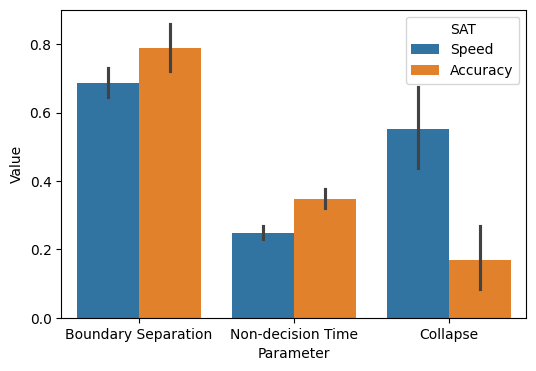

In [24]:
#df = pd.read_csv("DDM2vsvUniform101bins2a2terresultDutilh2019.csv")
df = df_OUM.copy()
f, ax = plt.subplots(1, 1,figsize=(6, 4))#, sharey=True)
sns.barplot(ax = ax, data=transform_df_DDM2a2c2ter(df), x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"])

In [19]:
df

,Drift Rate,Boundary Separation Speed,Boundary Separation Accuracy,Collapse Speed,Collapse Accuracy,Non-decision Time Speed,Non-decision Time Accuracy,BIC
0,1.167876,0.818274,0.772998,0.681156,0.000000,0.235264,0.358779,261.767445
0,0.447923,0.901437,0.892291,1.000000,0.098361,0.230462,0.457334,482.845839
0,1.589136,0.579339,0.844630,0.263056,0.326131,0.254907,0.364210,-19.494359
0,0.848247,0.509941,0.949740,0.297372,0.105263,0.182626,0.237414,292.244624
0,1.133617,0.724142,0.659012,0.557693,0.096775,0.201347,0.342952,143.547632
0,1.364882,0.775005,0.976578,1.000000,0.367647,0.330326,0.471186,24.895948
0,1.287084,0.655561,0.800158,0.339623,0.434342,0.246875,0.300734,84.972811
0,1.575746,0.826249,0.913764,0.952381,0.915254,0.282257,0.345716,-126.240752
0,1.377611,0.653928,0.677731,0.857143,0.000000,0.340578,0.368638,0.101037
0,0.799485,0.770343,1.078796,0.991991,0.282828,0.210538,0.438432,359.438990
